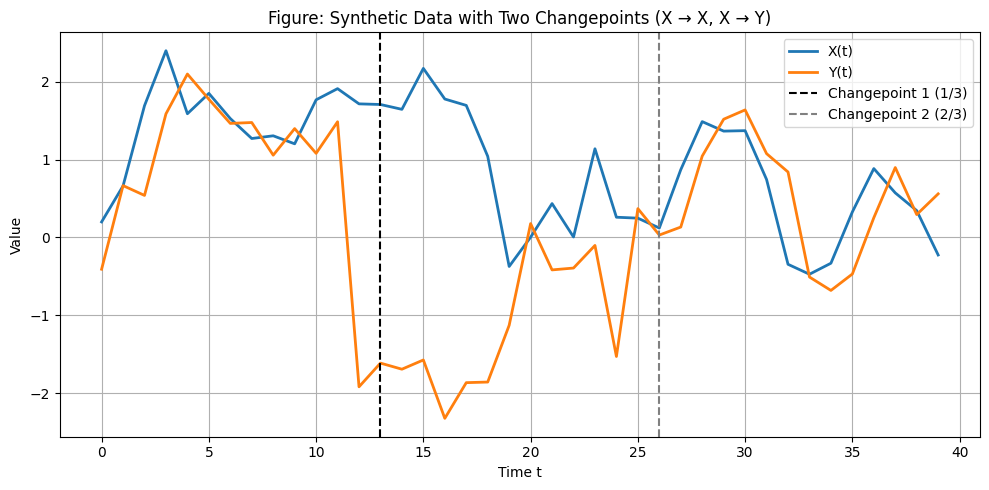

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_2_node_dataset(m=40, epsilon=0.5, snr=5):
    """
    Generate synthetic time series data for Figure 1a in the cpBGe paper.

    Parameters:
    - m: Number of time steps (default: 40, produces m+1 total points)
    - epsilon: Noise strength in X autoregressive process (between 0 and 1)
    - snr: Signal-to-noise ratio for Y

    Returns:
    - X: Time series for node X (length m)
    - Y: Time series for node Y (length m)
    - beta: Piecewise regression coefficients for Y(t+1) = beta(t) * X(t)
    - cp1, cp2: Indices of changepoints in beta
    """
    np.random.seed(0)  # For reproducibility

    # Initialize arrays
    X = np.zeros(m + 1)
    Y = np.zeros(m + 1)
    phi_x = np.random.normal(0, 1, m + 1)
    phi_y = np.random.normal(0, 1, m + 1)

    # Define changepoints: one-third and two-thirds of timeline
    cp1 = m // 3
    cp2 = 2 * m // 3

    # Define piecewise constant beta: [1, -1, 1] across the timeline
    beta = np.ones(m + 1)
    beta[cp1:cp2] = -1

    # Generate AR(1) process for X
    for t in range(m):
        X[t + 1] = np.sqrt(1 - epsilon**2) * X[t] + epsilon * phi_x[t + 1]

    # Calculate scaling factor 'c' to match desired signal-to-noise ratio in Y
    sigma_hat = np.std(beta[1:] * X[1:])
    c = sigma_hat / snr

    # Generate Y based on X and beta with added noise
    for t in range(m):
        Y[t + 1] = beta[t + 1] * X[t] + c * phi_y[t + 1]

    return X[1:], Y[1:], beta[1:], cp1, cp2

# Generate synthetic data
X, Y, beta, cp1, cp2 = generate_2_node_dataset()

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(X, label='X(t)', linewidth=2)
plt.plot(Y, label='Y(t)', linewidth=2)
plt.axvline(cp1, color='k', linestyle='--', label='Changepoint 1 (1/3)')
plt.axvline(cp2, color='gray', linestyle='--', label='Changepoint 2 (2/3)')
plt.title("Figure: Synthetic Data with Two Changepoints (X → X, X → Y)")
plt.xlabel("Time t")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


